In [2]:
import random as rnd
import time
import math
import matplotlib.pyplot as plt
from statistics import mean
import numpy
from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit

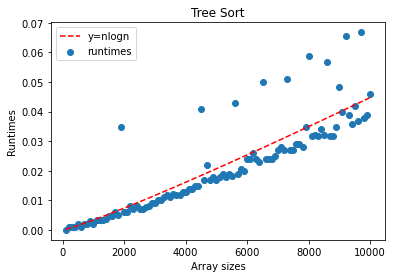

In [22]:
#TREE SORT
class node:
    def __init__(self,key):
        self.left=None
        self.right=None
        self.val=key
#Function to insert a new node(number)        
def insert(root,key):
    if root is None:
        return node(key)
    else:
        if(root.val==key):
            return root
        elif(root.val>key):
            root.left=insert(root.left,key)
        else:
            root.right=insert(root.right,key)
    return root
#Function for inorder traversal
def inorder_traversal(root,new_arr):
    if root:
        inorder_traversal(root.left,new_arr)
        new_arr.append(root.val)
        inorder_traversal(root.right,new_arr)

inp_sizes = []
for i in range(100):
    inp_sizes.append(100*(i+1))
rand_times=[]

for n in inp_sizes:
    arr=[]
    for i in range(n):
        arr.append(rnd.randint(-(3*n),(3*n)))
    
    r1=node(arr[0])
    inorder_arr=[]
    start=time.time()
    for i in range(1,len(arr)):
        r1=insert(r1,arr[i])
    inorder_traversal(r1,inorder_arr)
    end=time.time()
    rand_times.append(end-start)

def logarithmic(x,a):
    return a*x*numpy.log2(x)
x2=arange(min(inp_sizes),max(inp_sizes)+100,100)
d,_ = curve_fit(logarithmic,x2,rand_times)

y2=[]
for j in inp_sizes:
    y2.append(logarithmic(j,d))
    
plt.scatter(inp_sizes,rand_times)

plt.xlabel("Array sizes")
plt.ylabel("Runtimes")

plt.title("Tree Sort")
plt.plot(x2,y2,'--',color='red')        
plt.legend(["y=nlogn","runtimes"])        

As seen above T(n)=O(nlogn). This is the best/average case.

The blue dots that shoot higher than red line are the cases when the array is almost sorted or reverse sorted. In such case, the time complexity can be O(n^2). This is the worst case.

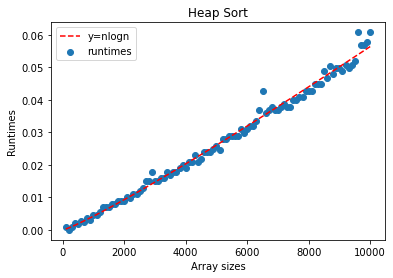

In [27]:
#HEAP SORT
def max_heapify(ind,max_heap):
    size=len(max_heap)
    if(ind>size):
        return
    larg_ind=ind
    child1=2*ind
    child2=2*ind + 1
    if(child1<size):
        if(max_heap[child1]>max_heap[larg_ind]):
            larg_ind=child1
    if(child2<size):
        if(max_heap[child2]>max_heap[larg_ind]):
            larg_ind=child2
    if(larg_ind!=ind):
        max_heap[ind],max_heap[larg_ind]=max_heap[larg_ind],max_heap[ind]
        max_heapify(larg_ind,max_heap)
    
            
def heap_insert(ele,max_heap):
    size=len(max_heap)
    if(size==0):
        max_heap.append(0)
    max_heap.append(ele)
    i=len(max_heap)-1
    cont=True
    while(i>1 and cont):
        p_i=math.floor(i/2)
        if(max_heap[i]>max_heap[p_i]):
            max_heap[i],max_heap[p_i]=max_heap[p_i],max_heap[i]
        else:
            cont=False
        i=p_i

def extract_max(max_heap):
    size=len(max_heap)-1
    value=max_heap[1]
    max_heap[1]=max_heap[size]
    max_heap.pop(size)
    max_heapify(1,max_heap)
    return value

def heap_sort(max_heap,sorted_arr):
    while(len(max_heap)>1):
        value=extract_max(max_heap)
        sorted_arr.append(value)
        
inp_sizes = []
for i in range(100):
    inp_sizes.append(100*(i+1))

times=[]
for n in inp_sizes:
    arr=[]
    heap=[]
    for i in range(n):
        arr.append(rnd.randint(-(3*n),(3*n)))
    start=time.time()
    for i in range(n):
        heap_insert(arr[i],heap)
    sorted_arr=[]
    heap_sort(heap,sorted_arr)
    end=time.time()
    times.append(end-start)

def logarithmic(x,a):
    return a*x*numpy.log2(x)
x2=arange(min(inp_sizes),max(inp_sizes)+100,100)
d,_ = curve_fit(logarithmic,x2,times)

y2=[]
for j in inp_sizes:
    y2.append(logarithmic(j,d))
    
plt.scatter(inp_sizes,times)

plt.xlabel("Array sizes")
plt.ylabel("Runtimes")

plt.title("Heap Sort")
plt.plot(x2,y2,'--',color='red')        
plt.legend(["y=nlogn","runtimes"])    

Perfecty fit, T(n) = O(nlogn)